In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import time 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Walmart.csv") 
df.head() 

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
# Does null variables exist? 
df.isnull().any()

Store           False
Date            False
Weekly_Sales    False
Holiday_Flag    False
Temperature     False
Fuel_Price      False
CPI             False
Unemployment    False
dtype: bool

In [4]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [5]:
df.drop(["Date"],axis=1,inplace=True) 
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
# Numerical columns are separated from categorical variables.("Holiday_Flag")
num_col = [col for col in df.columns if not col=="Holiday_Flag"] 
print(num_col) 

['Store', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']


In [7]:
def outlier_thresholds(dataframe, col_name, q1=0.15, q3=0.85):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [8]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [9]:
def replace_with_thresholds(dataframe, variable, q1=0.15, q3=0.85):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.15, q3=0.85)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit 

In [10]:
for col in num_col:
    print(col, check_outlier(df, col))
    if check_outlier(df, col):
        replace_with_thresholds(df, col)


Store False
Weekly_Sales True
Temperature False
Fuel_Price False
CPI False
Unemployment True


In [11]:
for col in num_col:
    print(col, check_outlier(df, col))

Store False
Weekly_Sales False
Temperature False
Fuel_Price False
CPI False
Unemployment False


In [12]:
scale = StandardScaler() 
df[num_col] = scale.fit_transform(df[num_col]) 
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,-1.693979,1.058418,0,-0.995136,-1.713800,1.004175,0.072167
1,-1.693979,1.055344,1,-1.201170,-1.766089,1.007880,0.072167
2,-1.693979,1.002160,0,-1.124178,-1.840166,1.009074,0.072167
3,-1.693979,0.643501,0,-0.760907,-1.737766,1.009849,0.072167
4,-1.693979,0.900788,0,-0.767955,-1.598328,1.010624,0.072167


In [13]:
y = df["Weekly_Sales"] 
x = df.drop("Weekly_Sales",axis=1)
print(x,y)

         Store  Holiday_Flag  Temperature  Fuel_Price       CPI  Unemployment
0    -1.693979             0    -0.995136   -1.713800  1.004175      0.072167
1    -1.693979             1    -1.201170   -1.766089  1.007880      0.072167
2    -1.693979             0    -1.124178   -1.840166  1.009074      0.072167
3    -1.693979             0    -0.760907   -1.737766  1.009849      0.072167
4    -1.693979             0    -0.767955   -1.598328  1.010624      0.072167
...        ...           ...          ...         ...       ...           ...
6430  1.693979             0     0.228602    1.390883  0.519270      0.392766
6431  1.693979             0     0.229144    1.364738  0.523256      0.383336
6432  1.693979             0    -0.335825    1.397419  0.527241      0.383336
6433  1.693979             0    -0.227385    1.329879  0.527332      0.383336
6434  1.693979             0    -0.098343    1.140330  0.526775      0.383336

[6435 rows x 6 columns] 0       1.058418
1       1.055344
2    

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.30,random_state=17)

In [15]:
print("X_train shape:",X_train.shape,"\nY_train shape:",Y_train.shape
     ,"\nX_test shape:",X_test.shape,"\nY_test shape:",Y_test.shape)

X_train shape: (4504, 6) 
Y_train shape: (4504,) 
X_test shape: (1931, 6) 
Y_test shape: (1931,)


In [16]:
type(X_train)

pandas.core.frame.DataFrame

In [17]:
# In our example we should convert the dataframe to numpy array.
X_train = X_train.to_numpy() 

In [137]:
type(X_train)

numpy.ndarray

In [18]:
X_test = X_test.to_numpy() 
Y_train = Y_train.to_numpy() 

In [19]:
Y_test = Y_test.to_numpy()  

In [20]:
type(X_test)

numpy.ndarray

In [21]:
type(Y_test)

numpy.ndarray

In [22]:
type(Y_train)

numpy.ndarray

In [23]:
X_train.shape

(4504, 6)

This is our dataset. Dataframe's columns converted to numpy array with few lines of code.

# Gradient Descent

Gradient Descent,is an optimization algorithm which updates parameters of cost function step by step.If we are training a model with very large set,it takes really long time. Therefore, an algorithm which called mini-batch gradient descent has been developed. Actually, we can say that gradient descent has 3 types. 
* **Batch Gradient Descent**
* **Mini-Batch Gradient Descent**
* **Stochastic gradient descent**

Their differences will be explained with graphs and by keeping time in this notebook.

## Batch Gradient Descent 

In batch gradient descent,whole dataset is used to calculate error.

In [24]:
def initilaze_parameters():  
    n= X_train.shape[1]
    w = np.random.randn((n))
    b= 0.
    return w,b

In [25]:
w,b = initilaze_parameters() 
print(w,b)

[-0.18198124 -1.30731017 -0.95795808  2.37753043 -1.48881862 -0.11547244] 0.0


These are the parameters we will use to calculate cost function.Let's implement single prediction with vectorization. 

In [26]:
def single_predict_vector(X_train,w,b): 
    p = np.dot(X_train,w) + b
    return p

In [27]:
def compute_cost(x,y,w,b): 
    m = x.shape[0]
    cost = 0.
    for i in range(m):
        y_hat = np.dot(x[i],w) + b
        cost = cost + (y_hat - y[i])**2 
    cost = cost / (2*m)
    return cost

In [28]:
print(compute_cost(X_train,Y_train,w,b))

5.161477753366711


In [29]:
def back_prob(x,y,w,b): 
    m,n = x.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.
    for i in range(m): 
        err = (np.dot(x[i],w) + b) - y[i]
        for j in range(n) : 
            dj_dw[j] = dj_dw[j] + err * x[i,j]
        dj_db = dj_db + err
        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_dw,dj_db

In [30]:
def batch_gradient_descent(x,y,w,b,iteration=2000,learning_rate=0.01): 
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    start_time = time.time()
    for i in range(iteration):  
        dj_dw,dj_db = back_prob(x,y,w,b)
        b = b - learning_rate * dj_db 
        w = w - learning_rate * dj_dw  
        J_history.append(compute_cost(x,y,w,b)) 
        if i % 100 == 0 : 
            print(f"Iteration:{i} Cost {J_history[-1]}") 
    finish_time = time.time()       
    print("Running time :",finish_time - start_time)
    return w,b,J_history # to get graph

In [31]:
w_final,b_final,J_hist = batch_gradient_descent(X_train,Y_train,w,b) 
print(f"Final value of parameters:{w_final},{b_final:0.3f}")

Iteration:0 Cost 5.051920854239725
Iteration:100 Cost 0.9643520528840085
Iteration:200 Cost 0.540877812639757
Iteration:300 Cost 0.4828211846010261
Iteration:400 Cost 0.4696875973626867
Iteration:500 Cost 0.46354559048937005
Iteration:600 Cost 0.4590874906962695
Iteration:700 Cost 0.45537953366197836
Iteration:800 Cost 0.4521806555599594
Iteration:900 Cost 0.44939007292163363
Iteration:1000 Cost 0.44694621109463034
Iteration:1100 Cost 0.44480286587978773
Iteration:1200 Cost 0.44292201528082265
Iteration:1300 Cost 0.4412711415773033
Iteration:1400 Cost 0.43982199590035836
Iteration:1500 Cost 0.438549883133151
Iteration:1600 Cost 0.43743316055999953
Iteration:1700 Cost 0.43645284157216363
Iteration:1800 Cost 0.4355922630473919
Iteration:1900 Cost 0.4348367986880194
Running time : 73.19230055809021
Final value of parameters:[-0.3568732  -0.26962285 -0.04552426  0.0044619  -0.16238951 -0.07510516],0.031


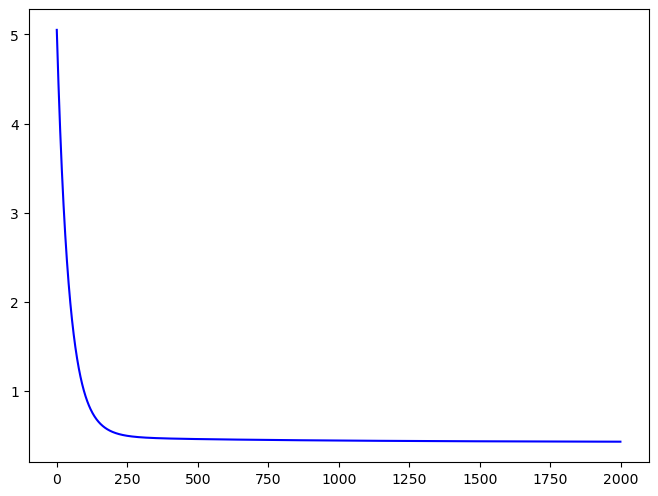

In [32]:
fig = plt.figure(figsize=(8,6), dpi=100) 
plt.plot(J_hist,c="b") 
plt.show()

In [33]:
def get_predict(X,w_final,b_final): 
    predict = np.dot(X,w_final) + b_final 
    return predict

Our cost function decreases normally and running time is 136 seconds(It can be change). In next cells, mini_batch gradient descent and stochastic dradient descent will be implemented. Then running time and cost function will be compared. 

## Mini-Batch Gradient Descent

Parameters are updated after computing the gradient of  the error with respect to a subset of the training set. We expect it will run faster. 

In [34]:
def mini_batches(X,Y,batch_size=32,seed = 0): 
    n = int(X_train.shape[0] / 32)
    mini_batches_x = []  
    mini_batches_y = []  
    for i in range(n) : 
        tmp1 = i*batch_size
        tmp2 = (i+1)*batch_size
        mini_batches_x.append(X[tmp1:tmp2])
        mini_batches_y.append(Y[tmp1:tmp2])  
    return mini_batches_x,mini_batches_y
    

In [35]:
mini_batches_x,mini_batches_y = mini_batches(X_train,Y_train)

In [37]:
print(mini_batches_x)

[array([[ 0.1539981 ,  0.        ,  0.35439139,  0.75033799,  0.94995301,
        -0.38931663],
       [-0.3079962 ,  0.        ,  0.11365617,  1.26015964, -0.89607673,
        -0.09423315],
       [ 0.3079962 ,  0.        ,  0.93074622,  1.21222769, -0.81003307,
        -0.06982775],
       [ 0.9239886 ,  0.        ,  0.10606542, -1.06671865, -0.90951549,
         0.59632875],
       [-1.23198481,  0.        , -1.11658757, -1.2802337 ,  0.45619282,
         0.54751795],
       [-1.61698006,  0.        ,  0.88086415,  0.56950382,  1.27637342,
        -0.78257637],
       [ 0.23099715,  0.        , -0.04195421,  0.99435519, -0.91812551,
        -0.11586521],
       [-0.3079962 ,  0.        , -1.74011348, -0.97956965, -1.01493482,
         0.20750635],
       [ 0.69299145,  0.        ,  0.01172324,  0.51721442,  0.58860041,
         0.3583761 ],
       [-0.53899335,  0.        , -1.47552162, -1.45235298,  0.46135152,
        -0.51966365],
       [ 0.23099715,  0.        , -1.99331923,  0

In [38]:
len(mini_batches_x[0]) # Mini batch size

32

In [39]:
len(mini_batches_x) # Number of Mini batches

140

In [40]:
print(mini_batches_y)

[array([-0.6155409 ,  0.56530347,  1.26850673,  0.2680442 , -1.15523935,
        1.47179885,  0.0412302 ,  0.83192505,  0.16959113, -0.96219559,
       -0.14379202, -0.31735652,  1.91217015,  0.60873218, -1.13439976,
       -0.82115879, -0.94047183,  0.8182055 ,  1.14596846, -0.40958126,
       -1.14237254,  0.86945689, -0.06680316,  1.76718308,  1.37049771,
        2.7706188 , -1.12521183,  1.40221894, -1.13875106, -1.31940937,
       -0.2989211 , -0.43754409]), array([-0.53574754,  0.40074598,  1.86809675, -1.03014503, -1.04175884,
        0.80553536,  1.05841791,  1.62402425,  0.42744769,  1.29011917,
        1.82128326,  2.05141011,  1.8554813 , -0.13211391,  1.51879897,
       -0.1252538 ,  1.52734746,  2.44869467,  1.17097363,  2.592901  ,
       -1.32682903, -1.19586592, -0.75819839, -0.94878089, -0.20250836,
        0.83450142, -1.01719821, -0.33708254, -0.99673889,  0.31575061,
       -0.12475575,  1.7855533 ]), array([-0.47026962, -1.23724199, -0.31608481, -1.07139045,  1.149

In [41]:
len(mini_batches_y[0]) # Mini batch size

32

In [42]:
len(mini_batches_y) # Number of Mini batches

140

In [43]:
w,b = initilaze_parameters()

In [44]:
def mini_batch_gradient_descent(mini_batches_x,mini_batches_y,w,b,learning_rate=0.01,epoch=500):   
    J_history = [] 
    start_time = time.time()
    for j in range(epoch) : 
        for i in range(len(mini_batches_x)) : 
            dj_dw, dj_db = back_prob(mini_batches_x[i],mini_batches_y[i],w,b) 
            b = b - learning_rate * dj_db 
            w = w - learning_rate * dj_dw  
            J_history.append([compute_cost(mini_batches_x[i],mini_batches_y[i],w,b)])
        if j%50 == 0: 
            print(f"Epoch:{j} Cost {J_history[-1]}")
    finish_time = time.time() 
    print("Running time:",finish_time-start_time) 
    return w,b,J_history 

In [45]:
w_last,b_last,Cost_hist = mini_batch_gradient_descent(mini_batches_x,mini_batches_y,w,b)

Epoch:0 Cost [0.7141996666027931]
Epoch:50 Cost [0.4062302402067822]
Epoch:100 Cost [0.4056893768904467]
Epoch:150 Cost [0.40568386754629604]
Epoch:200 Cost [0.40568380964187895]
Epoch:250 Cost [0.40568380903308715]
Epoch:300 Cost [0.4056838090266864]
Epoch:350 Cost [0.40568380902661927]
Epoch:400 Cost [0.4056838090266182]
Epoch:450 Cost [0.40568380902661816]
Running time: 18.70983386039734


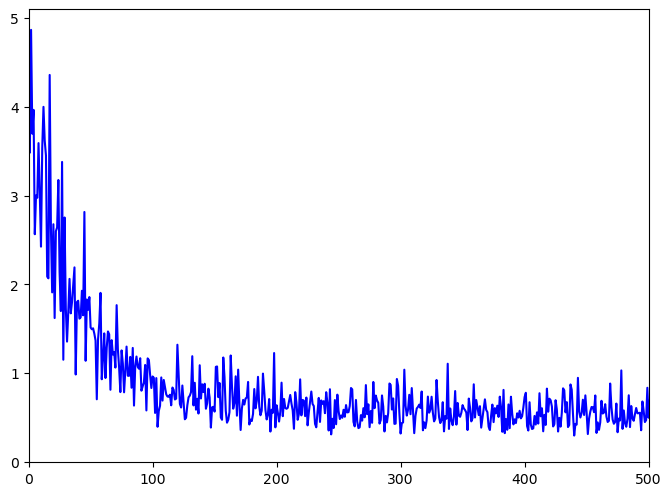

In [46]:
fig = plt.figure(figsize=(8,6), dpi=100) 
plt.xlim(0,500)
plt.plot(Cost_hist,c="b") 
plt.show()

# Stochastic gradient descent

The algorithm calculates the gradient for one observation picked at random, instead of calculating the gradient for the entire dataset.Therefore it is not optimum but gennerally it gives good result.However, we lose advantage of vectorization 

In [47]:
w,b = initilaze_parameters()

In [52]:
def compute_loss(X,Y,w,b): 
    loss = ((np.dot(w,X) + b) -Y )**2
    return loss

In [53]:
def stochastic_gradient_descent(X_train,Y_train,w,b,learning_rate=0.01,iterition=4000): 
    C_history = [] 
    start_time = time.time()
    for i in range(iterition): 
        random_index = np.random.randint(0, len(X_train), 1) # random sample 
        dj_dw, dj_db = back_prob(X_train[random_index],Y_train[random_index],w,b) 
        b = b - learning_rate * dj_db 
        w = w - learning_rate * dj_dw  
        C_history.append([compute_loss(X_train[i],Y_train[i],w,b)]) 
        if i%100 == 0: 
            print(f"Iter:{i} Cost {C_history[-1]}") 
    finish_time = time.time() 
    print("Running time:",finish_time-start_time)
    return w,b,C_history

In [54]:
ww,bb,Costes = stochastic_gradient_descent(X_train,Y_train,w,b)

Iter:0 Cost [0.1900785422513979]
Iter:100 Cost [1.84622570098636]
Iter:200 Cost [0.35959133893872364]
Iter:300 Cost [0.2972286415184118]
Iter:400 Cost [4.399720829060709]
Iter:500 Cost [1.3210360290005017]
Iter:600 Cost [6.3136857589954625]
Iter:700 Cost [1.2647566096321352]
Iter:800 Cost [2.0058258361427286]
Iter:900 Cost [0.000945806049889233]
Iter:1000 Cost [0.435928530810893]
Iter:1100 Cost [0.527014521937653]
Iter:1200 Cost [0.10440405643466728]
Iter:1300 Cost [1.3921802226611144]
Iter:1400 Cost [2.578384280959158]
Iter:1500 Cost [0.22180254882071423]
Iter:1600 Cost [0.6712338302939902]
Iter:1700 Cost [0.2703989497112918]
Iter:1800 Cost [0.39753143552508746]
Iter:1900 Cost [1.1492972082288395]
Iter:2000 Cost [0.03482067532826478]
Iter:2100 Cost [1.2524390280624982]
Iter:2200 Cost [0.12983148555717247]
Iter:2300 Cost [0.18234552869571363]
Iter:2400 Cost [2.1177205753067345]
Iter:2500 Cost [1.9313450075835883]
Iter:2600 Cost [1.4642018934804664]
Iter:2700 Cost [0.36241468294094836]


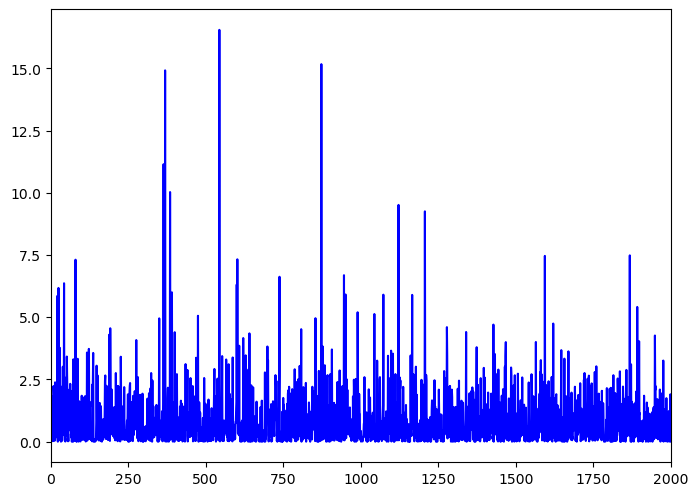

In [55]:
fig = plt.figure(figsize=(8,6), dpi=100) 
plt.xlim(0,2000)
plt.plot(Costes,c="b") 
plt.show()